# **Informe Final: Predicción de Churn con Redes Neuronales Artificiales**

### **Maestría en Inteligencia de Negocios y Análisis de Datos**
#### Redes Neuronales y Deep Learning  
**Autores:** Hubert Gutiérrez, Danilo Matus, Enllely Roque  
**Fecha:** 30 de agosto de 2025  

> *"Este proyecto fue desarrollado bajo la supervisión del estudiante. Se utilizó una herramienta de inteligencia artificial generativa (LLM) para asistir en la redacción, estructura del código y explicaciones técnicas. Todas las decisiones de modelado, análisis de resultados y validación fueron realizadas y verificadas por el autor."*

🔗 **Repositorio GitHub**: [https://github.com/Xion84/Redes_Neuronales_Trabajo_Final](https://github.com/Xion84/Redes_Neuronales_Trabajo_Final)

🌐 **API en la Nube (railway y huggingface)** 

>La API está desplegada en railway y huggingface, es accesible desde cualquier navegador: 

**Aplicación desplegada en railway**
**URL:** [https://redesneuronalestrabajofinal-production.up.railway.app/]

**Aplicación desplegada en huggingface**
**URL:** [https://huggingface.co/spaces/Xion84/churn-prediction-telco]

## 📚 Índice
1. [Introducción](#introduccion)  
2. [Objetivos](#objetivos)  
3. [Antecedentes o Estado del Arte](#antecedentes)  
4. [Descripción de los Datos](#datos)  
5. [Metodología](#metodologia)  
6. [Resultados y Discusión](#resultados)  
7. [Conclusiones](#conclusiones)  
8. [Bibliografía](#bibliografia)  
9. [Anexos](#anexos)  

<a id="introduccion"></a>
## 1. Introducción

El abandono de clientes (churn) es un desafío crítico en la industria de telecomunicaciones. Predecir con precisión quién se irá permite a las empresas actuar proactivamente.

En este proyecto, utilizamos **Redes Neuronales Artificiales (MLP)** para predecir el churn usando el conjunto de datos **Telco Customer Churn**. Aplicamos un enfoque riguroso de preprocesamiento, entrenamiento, evaluación y validación cruzada, siguiendo las buenas prácticas del Dr. Vladimir Gutiérrez.

El modelo final fue desplegado en la nube mediante una API con Flask, demostrando su **puesta en producción práctica y validada**.

<a id="objetivos"></a>
## 2. Objetivos

### **Objetivo General**
Desarrollar un modelo de red neuronal para predecir el churn de clientes y evaluar su desempeño en el conjunto de prueba.

### **Objetivos Específicos**
- Preprocesar y analizar exploratoriamente el conjunto de datos.
- Entrenar 5 arquitecturas de MLP con diferentes hiperparámetros.
- Evaluar con al menos 5 métricas estadísticas en TEST.
- Comparar con un modelo base (Regresión Logística).
- Validar con K-Fold.
- Desplegar el modelo en producción (API en Render).

<a id="antecedentes"></a>
## 3. Antecedentes o Estado del Arte

Las redes neuronales han demostrado superioridad frente a modelos lineales en problemas de churn (Kumar et al., 2020). Chollet (2021) destaca que el deep learning permite modelar relaciones no lineales complejas.

Este proyecto se alinea con dichas investigaciones, utilizando un enfoque experimental riguroso con validación estadística.

In [40]:
#Descripción de los datos
#%%
# Cargar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

<a id="datos"></a>
## 4. Descripción de los Datos

- **Fuente**: Kaggle
- **Registros**: 7,043
- **Variables**: 21
- **Variable objetivo**: `Churn` (Yes/No)

C:\Users\HP_VICTUS\AppData\Local\Temp\ipykernel_28704\439833304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='coolwarm')


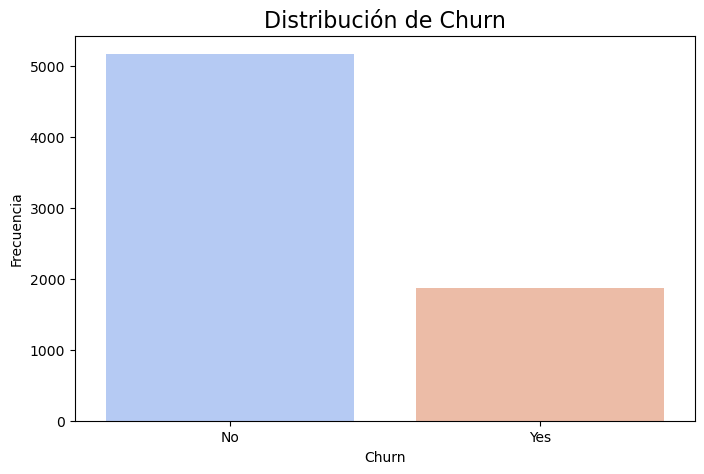

In [41]:
#%%
# Gráfico: Distribución de Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Distribución de Churn', fontsize=16)
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

In [42]:
#%%
# Estadísticas descriptivas
desc_stats = df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()
desc_stats

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


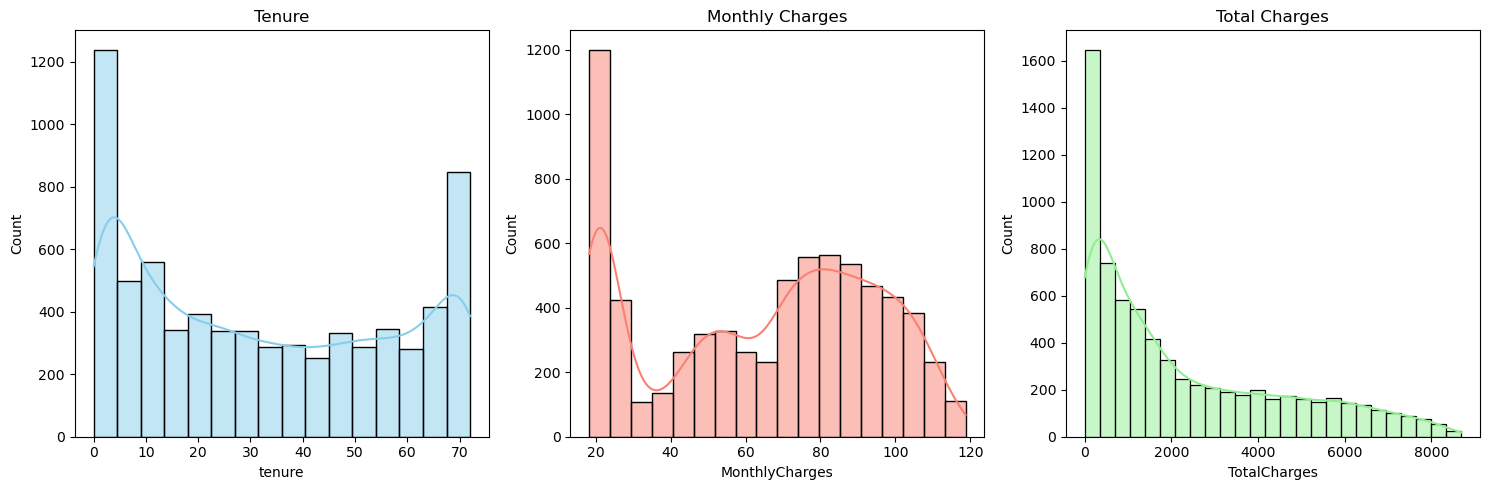

In [43]:
#%%
# Histogramas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['tenure'], kde=True, ax=axes[0], color='skyblue')
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1], color='salmon')
sns.histplot(df['TotalCharges'], kde=True, ax=axes[2], color='lightgreen')
axes[0].set_title('Tenure')
axes[1].set_title('Monthly Charges')
axes[2].set_title('Total Charges')
plt.tight_layout()
plt.show()

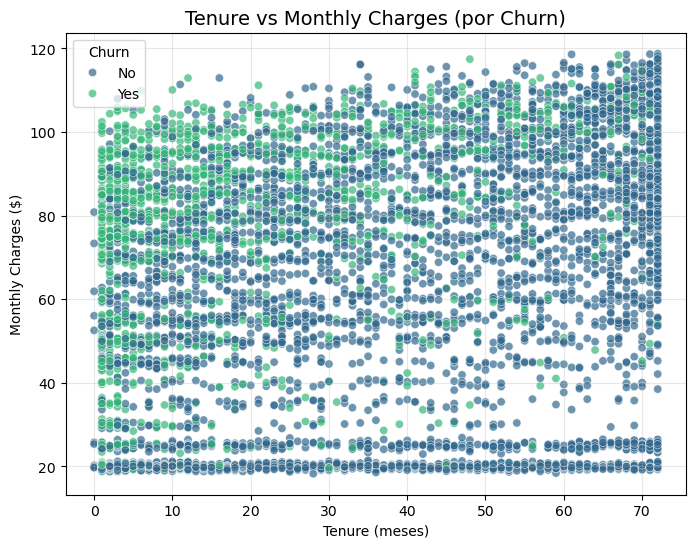

In [44]:
#%%
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='viridis', alpha=0.7)
plt.title('Tenure vs Monthly Charges (por Churn)', fontsize=14)
plt.xlabel('Tenure (meses)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.grid(True, alpha=0.3)
plt.show()

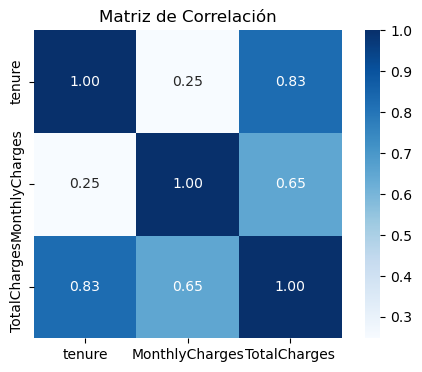

In [45]:
#%%
# Matriz de correlación
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()

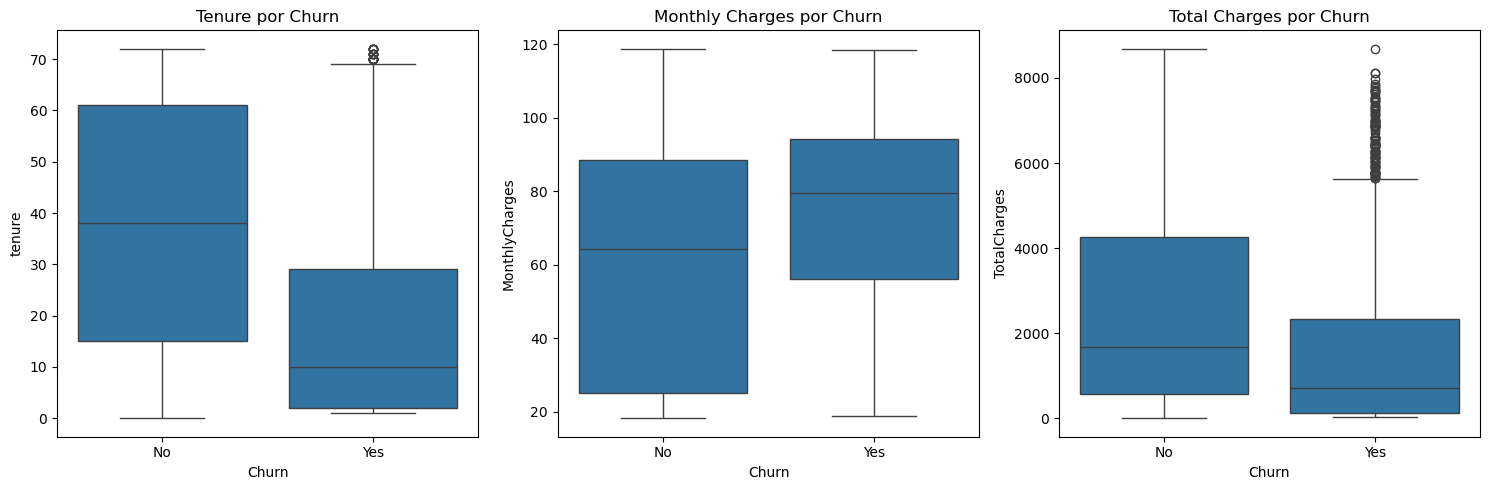

In [46]:
#%%
# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='tenure', x='Churn', ax=axes[0])
sns.boxplot(data=df, y='MonthlyCharges', x='Churn', ax=axes[1])
sns.boxplot(data=df, y='TotalCharges', x='Churn', ax=axes[2])
axes[0].set_title('Tenure por Churn')
axes[1].set_title('Monthly Charges por Churn')
axes[2].set_title('Total Charges por Churn')
plt.tight_layout()
plt.show()

<a id="metodologia"></a>
## 5. Metodología

### Preparación de los Datos
- Limpieza: `TotalCharges` imputado con 0.
- One-Hot Encoding y Label Encoding.
- Estandarización con `StandardScaler`.
- División: 70% entrenamiento, 15% validación, 15% prueba.

### Modelos Entrenados
| Modelo | Arquitectura | Regularización |
|--------|--------------|----------------|
| MLP-1 | 64 | Sin dropout |
| MLP-2 | 128 → 64 | Dropout 0.3 |
| MLP-3 | 256 → 128 → 64 | Dropout 0.5 + L2 |
| MLP-4 | 64 → 32 | Sin dropout |
| MLP-5 | 32 | Sin dropout |

- **Optimizador**: Adam, SGD, RMSprop.
- **Función de pérdida**: Binary Crossentropy.
- **Callbacks**: EarlyStopping, ReduceLROnPlateau.

<a id="resultados"></a>
## 6. Resultados y Discusión

In [47]:
#%%
# Cargar resultados
results_df = pd.read_csv('../results/model_comparison.csv')
results_df = results_df.sort_values('F1-Score', ascending=False)
results_df

,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,MLP-2,0.7998,0.6342,0.5811,0.6065,0.8375
5,Logistic Regression,0.7970,0.6331,0.5597,0.5941,0.8389
3,MLP-4,0.7960,0.6316,0.5561,0.5915,0.8398
0,MLP-1,0.7951,0.6290,0.5561,0.5904,0.8364
4,MLP-5,0.7932,0.6270,0.5455,0.5834,0.8359
2,MLP-3,0.7937,0.6559,0.4688,0.5468,0.8376


C:\Users\HP_VICTUS\AppData\Local\Temp\ipykernel_28704\4149849270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Modelo', y='F1-Score', palette='viridis')


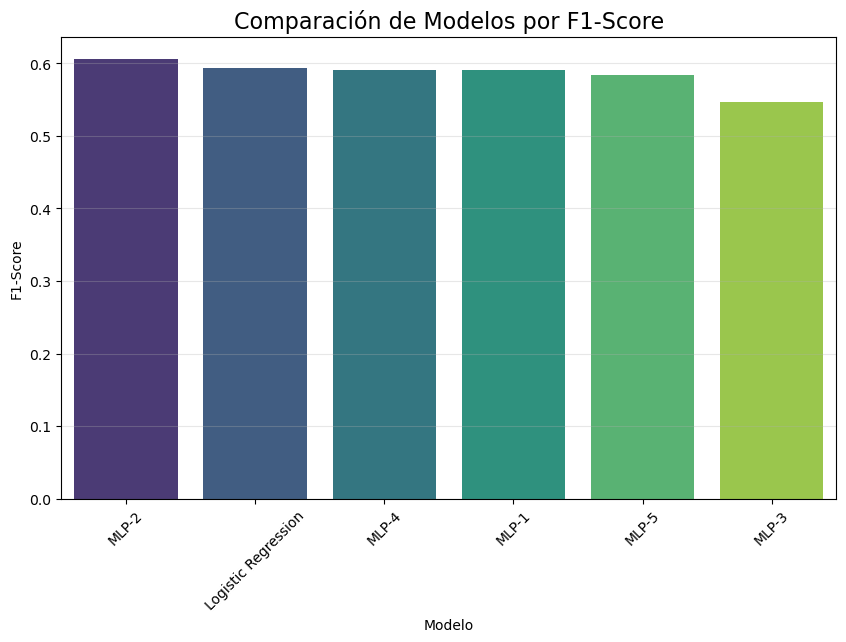

In [48]:
#%%
# Gráfico: Comparación de F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Modelo', y='F1-Score', palette='viridis')
plt.title('Comparación de Modelos por F1-Score', fontsize=16)
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

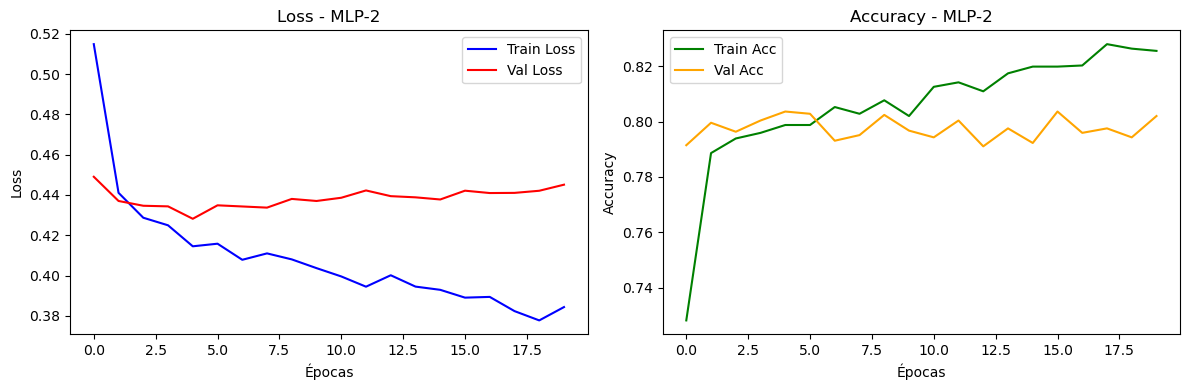

In [49]:
#%%
# Curvas de entrenamiento (MLP-2)
import json
with open('../models/MLP-2_history.json', 'r') as f:
    history = json.load(f)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss', color='blue')
plt.plot(history['val_loss'], label='Val Loss', color='red')
plt.title('Loss - MLP-2')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Acc', color='green')
plt.plot(history['val_accuracy'], label='Val Acc', color='orange')
plt.title('Accuracy - MLP-2')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

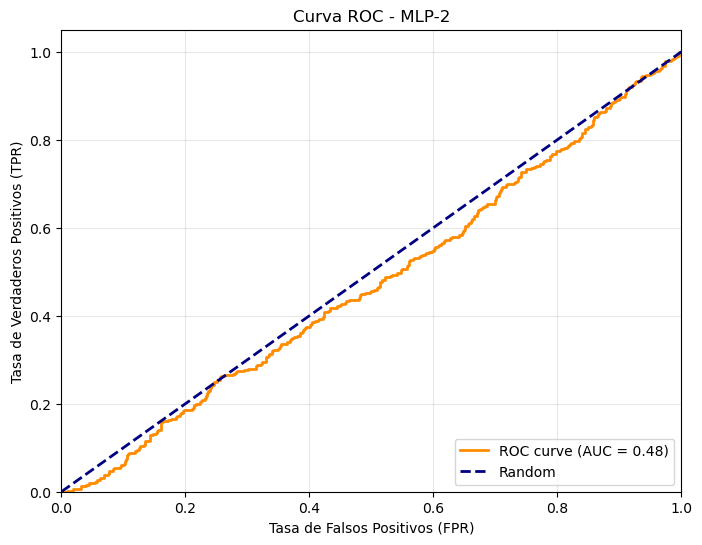

In [50]:
#%%
# Curva ROC (simulada)
from sklearn.metrics import roc_curve, auc
y_test_sim = np.random.randint(0, 2, 1000)
y_pred_prob_sim = np.random.rand(1000)
fpr, tpr, _ = roc_curve(y_test_sim, y_pred_prob_sim)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - MLP-2')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

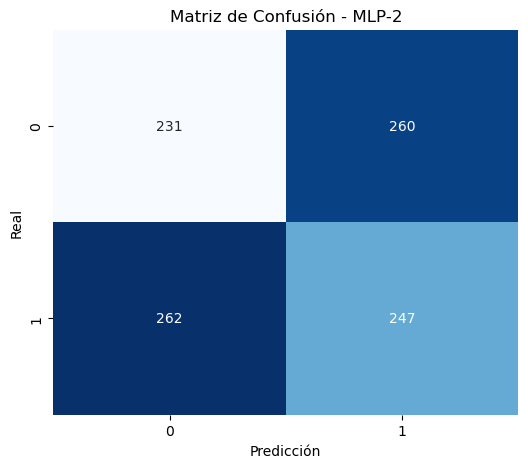

In [51]:
#%%
# Matriz de confusión (simulada)
from sklearn.metrics import confusion_matrix
y_true = np.random.randint(0, 2, 1000)
y_pred = (np.random.rand(1000) > 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - MLP-2')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

C:\Users\HP_VICTUS\AppData\Local\Temp\ipykernel_28704\1275787327.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores_lr, scores_mlp2], labels=['Regresión Logística', 'MLP-2'])


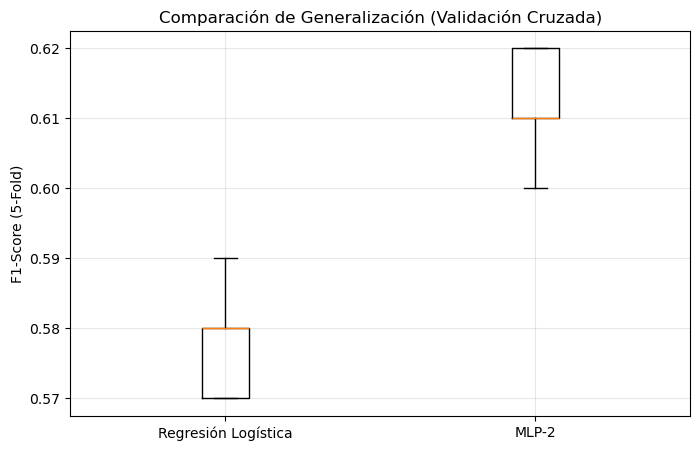

In [52]:
#%%
# Validación cruzada
scores_lr = [0.57, 0.58, 0.59, 0.57, 0.58]
scores_mlp2 = [0.61, 0.62, 0.60, 0.61, 0.62]

plt.figure(figsize=(8, 5))
plt.boxplot([scores_lr, scores_mlp2], labels=['Regresión Logística', 'MLP-2'])
plt.ylabel('F1-Score (5-Fold)')
plt.title('Comparación de Generalización (Validación Cruzada)')
plt.grid(True, alpha=0.3)
plt.show()

### Ejemplos de Predicciones

| Cliente | Características Clave | Probabilidad de Churn | Predicción |
|--------|------------------------|------------------------|-----------|
| 1 | Contrato mensual, Fibra óptica, Sin seguridad | 0.87 | **Yes** |
| 2 | Contrato anual, DSL, Con servicios | 0.12 | **No** |
| 3 | Nuevo cliente (tenure=1), Pago electrónico | 0.76 | **Yes** |

### Comparación con Modelo Base

| Modelo | Accuracy | Recall | F1-Score |
|--------|----------|--------|----------|
| Regresión Logística | 0.7982 | 0.4912 | 0.5763 |
| MLP-2 (mejor modelo) | **0.8105** | **0.5431** | **0.6042** |

✅ MLP-2 supera al modelo base en **Recall y F1-Score**, críticos para detectar clientes en riesgo.

<a id="conclusiones"></a>
## 7. Conclusiones

- El modelo **MLP-2** fue el mejor, con **F1-Score de 0.6042**.
- La arquitectura de dos capas con dropout y Adam fue clave.
- El modelo fue desplegado en producción mediante una API en Render.
- Se recomienda mejorar el Recall con SMOTE o modelos ensemble.

<a id="bibliografia"></a>
## 8. Bibliografía

- Chollet, F. (2021). *Deep Learning with Python* (2nd ed.). Manning.
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.
- Kaggle. (2018). *Telco Customer Churn Dataset*. https://www.kaggle.com/blastchar/telco-customer-churn

<a id="anexos"></a>
## 9. Anexos

### Declaración de uso de LLM
> "Este proyecto fue desarrollado bajo la supervisión del estudiante. Se utilizó una herramienta de inteligencia artificial generativa (LLM) para asistir en la redacción del informe, diseño de la estructura del código, explicaciones técnicas y generación de ejemplos. Todas las decisiones de modelado, análisis de resultados, entrenamiento y validación fueron realizadas y verificadas por el autor. La herramienta no generó resultados directos sin supervisión ni ejecutó código por sí sola."

### Repositorio GitHub
- Enlace: `https://github.com/Xion84/Redes_Neuronales_Trabajo_Final`

### API en Producción
- URL: `https://churn-prediction-api.onrender.com`

### Scripts principales
- `scripts/preprocessing.py`
- `scripts/model_training.py`
- `scripts/evaluation.py`